# VTX Measurement analysis



In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [2]:
from pandas_visual_analysis import VisualAnalysis

In [3]:
csv_files = "csv/DEMO_VTX_DEMO_MODE_MYYNK_20210612_23-48-54.csv;csv/DEMO_VTX_DEMO_MODE_PUWVB_20210613_07-54-13.csv"
csv_files = "csv/DEMO_VTX_DEMO_MODE_MYYNK_20210612_23-48-54.csv"

csv_files = csv_files.replace(';',',')

In [4]:
csv_list = csv_files.split(',')
csv_sep = ';'
csv_decimal = ','

In [5]:
csv_list

['csv/DEMO_VTX_DEMO_MODE_MYYNK_20210612_23-48-54.csv']

In [6]:
df_list = []
for f in csv_list:
    df_list.append(pd.read_csv(f, sep=csv_sep, decimal=csv_decimal, header=0, encoding='utf-8'))

print(len(df_list))

1


In [7]:
df = pd.DataFrame()
df = pd.concat(df_list)

In [8]:
df.shape

(2400, 12)

In [9]:
df.head(5)

,TS,Test,Model,Target Band,Target Freq,Target mW,Target dBm,Info,mW,dBm,dif_mW,dif_dBm
0,1623533893000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",23.98,13.80,-1.02,-0.18
1,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",24.10,13.82,-0.90,-0.16
2,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",28.25,14.51,3.25,0.53
3,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",28.99,14.62,3.99,0.64
4,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",26.45,14.22,1.45,0.25


In [22]:
df1 = df.loc[(df["Target mW"] == 25.0) & (df["Target Freq"] == 5865)]
df1.head(5)

,TS,Test,Model,Target Band,Target Freq,Target mW,Target dBm,Info,mW,dBm,dif_mW,dif_dBm
0,1623533893000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",23.98,13.80,-1.02,-0.18
1,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",24.10,13.82,-0.90,-0.16
2,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",28.25,14.51,3.25,0.53
3,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",28.99,14.62,3.99,0.64
4,1623533894000000000,20210612_1623533887,DEMO_MODE_MYYNK,A,5865,25.0,13.98,"Teststand, manuelle Einstellungen",26.45,14.22,1.45,0.25


In [24]:
#VisualAnalysis(df)


#categorical = ["Model", "Target Band", "Target Freq", "Target mW", "Info", "Test"]
#VisualAnalysis(df1, 
#                categorical_columns=categorical,
#                layout=[["Scatter", "Histogram"],["Scatter", 'BoxPlot'], ["Histogram"], ['BrushSummary']]
#                )

In [27]:
VisualAnalysis.widgets()

['Scatter',
 'ParallelCoordinates',
 'BrushSummary',
 'Histogram',
 'ParallelCategories',
 'BoxPlot']

# MatPlotLib

In [28]:
# Font parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2
# Tick properties
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.direction'] = 'out'

## Heatmap

### Achsen
* X-Achse = Frequenz im Band
* Y-Achse = Band (A,B,E,F.....)
* Z-Achse = mW (gemessen)

### Farben
* je roter je mehr 

[]

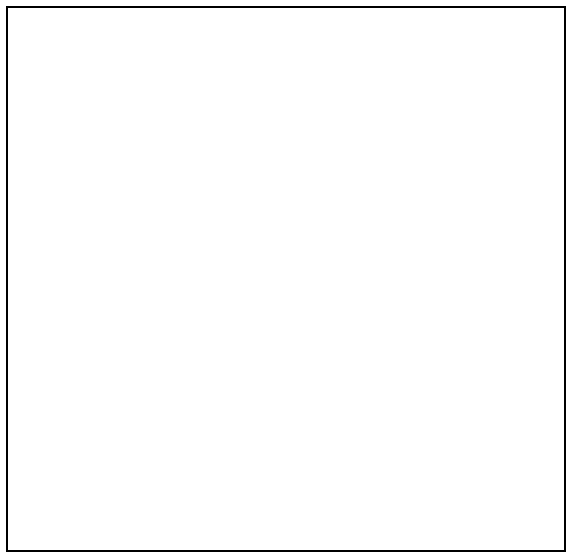

In [30]:
# Create figure and add axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])